# Dataset description

The dataset contains socio-economic and health indicators for different countries.The aim is to segregate the countries into different clusteres based on these indicators

Country: Name of the country.

Child Mortality: Child mortality rate per 1000 live births, which is a measure of the number of deaths of children under five years of age per 1000 live births.

Exports: Exports of goods and services as a percentage of GDP (Gross Domestic Product), representing the portion of a country's economy that is involved in international trade.

Health: Total expenditure on health as a percentage of GDP, indicating the proportion of a country's economic resources allocated to healthcare.

Imports: Imports of goods and services as a percentage of GDP, similar to exports but representing the portion of goods and services brought into the country.

Income: Per capita income of the country, representing the average income earned per person in the country.

Inflation: Annual inflation rate, which measures the percentage change in the price level of goods and services over a year.
Life Expectancy: Average number of years a newborn is expected to live, which is an important indicator of the overall health and well-being of a population.

Total Fertility: Total fertility rate, which represents the average number of children born to a woman during her reproductive years.

GDP per Capita (GDPP): GDP per capita, which is a measure of the economic output of a country divided by its population, indicating the average wealth or standard of living of the population.

The dataset contains socio-economic and health indicators for multiple countries. It encompasses a wide range of variables including child mortality rates, exports and imports as a percentage of GDP, health expenditure relative to GDP, per capita income, inflation rates, life expectancy, total fertility rates, and GDP per capita (GDPP). These indicators offer insights into various aspects of a country's development, including its economic performance, healthcare system, and population demographics. Analyzing this dataset allows for a comprehensive assessment of the socio-economic and health status of different countries, facilitating comparisons and identifying areas for potential intervention or policy reform.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA

In [168]:
data = pd.read_csv("C:\\Users\\Asus\\Downloads\\Country-data.csv")

In [169]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# EDA and preprocessing

In [201]:
data.shape

(167, 10)

There are 167 rows and 10 coloumns in the dataset

In [202]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,group
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,1.287425,3.317365
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,0.799863,1.280483
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,0.000000,0.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,1.000000,4.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,2.000000,4.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,2.000000,4.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,2.000000,4.000000


Statistics summarize the socio-economic and health factors of 167 countries. On average, the countries have a moderate child mortality rate, with substantial variations across nations. Export and import figures indicate a diverse range of economic activity, while health expenditure as a percentage of GDP exhibits considerable variability. Income levels vary widely, with a significant spread from low to high-income countries. The inflation rate is moderate on average, but again, there are significant disparities among nations. Life expectancy shows a promising average, albeit with variations across countries. Total fertility rates suggest diversity in population growth patterns. Finally, GDP per capita reflects a wide range of economic development levels among the countries. Overall, the dataset underscores the considerable heterogeneity among nations concerning socio-economic development and health outcomes.








In [170]:
#checking for missing values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no missing values in the dataset

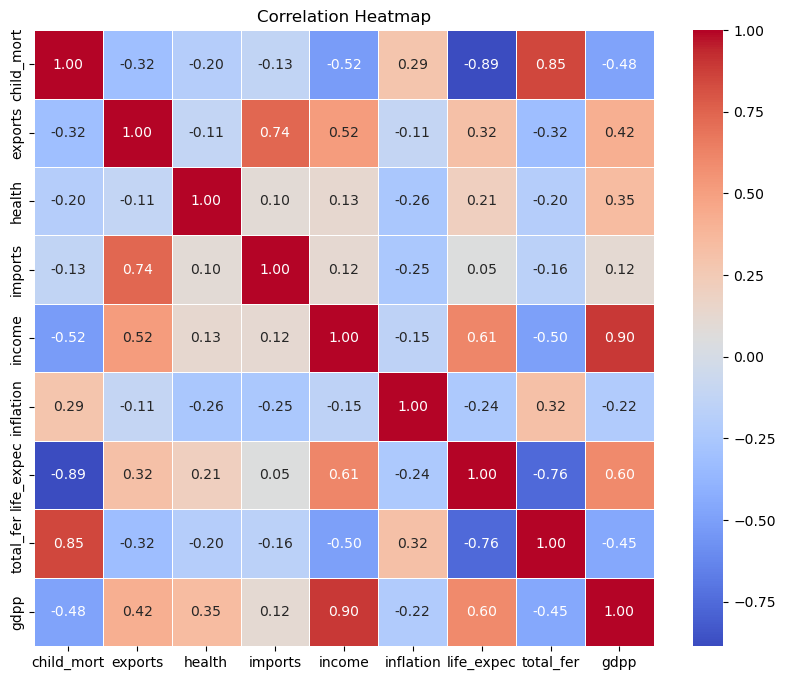

In [171]:
# Calculate the correlation matrix
corr = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Income and life expectancy: There is a strong positive correlation between income and life expectancy (0.61). This means that countries with higher incomes tend to have longer life expectancies.

Child mortality and life expectancy: There is a strong negative correlation between child mortality and life expectancy (-0.89). This means that countries with higher child mortality rates tend to have lower life expectancies.

Health and life expectancy: There is a moderate positive correlation between health and life expectancy (0.50). This means that countries with healthier populations tend to have longer life expectancies.

Trade and income: There is a weak positive correlation between exports and income (0.52). This means that countries with higher exports tend to have higher incomes. There is a weaker negative correlation between imports and income (-0.12). This means there isn't a strong relationship between a country importing goods and its income.

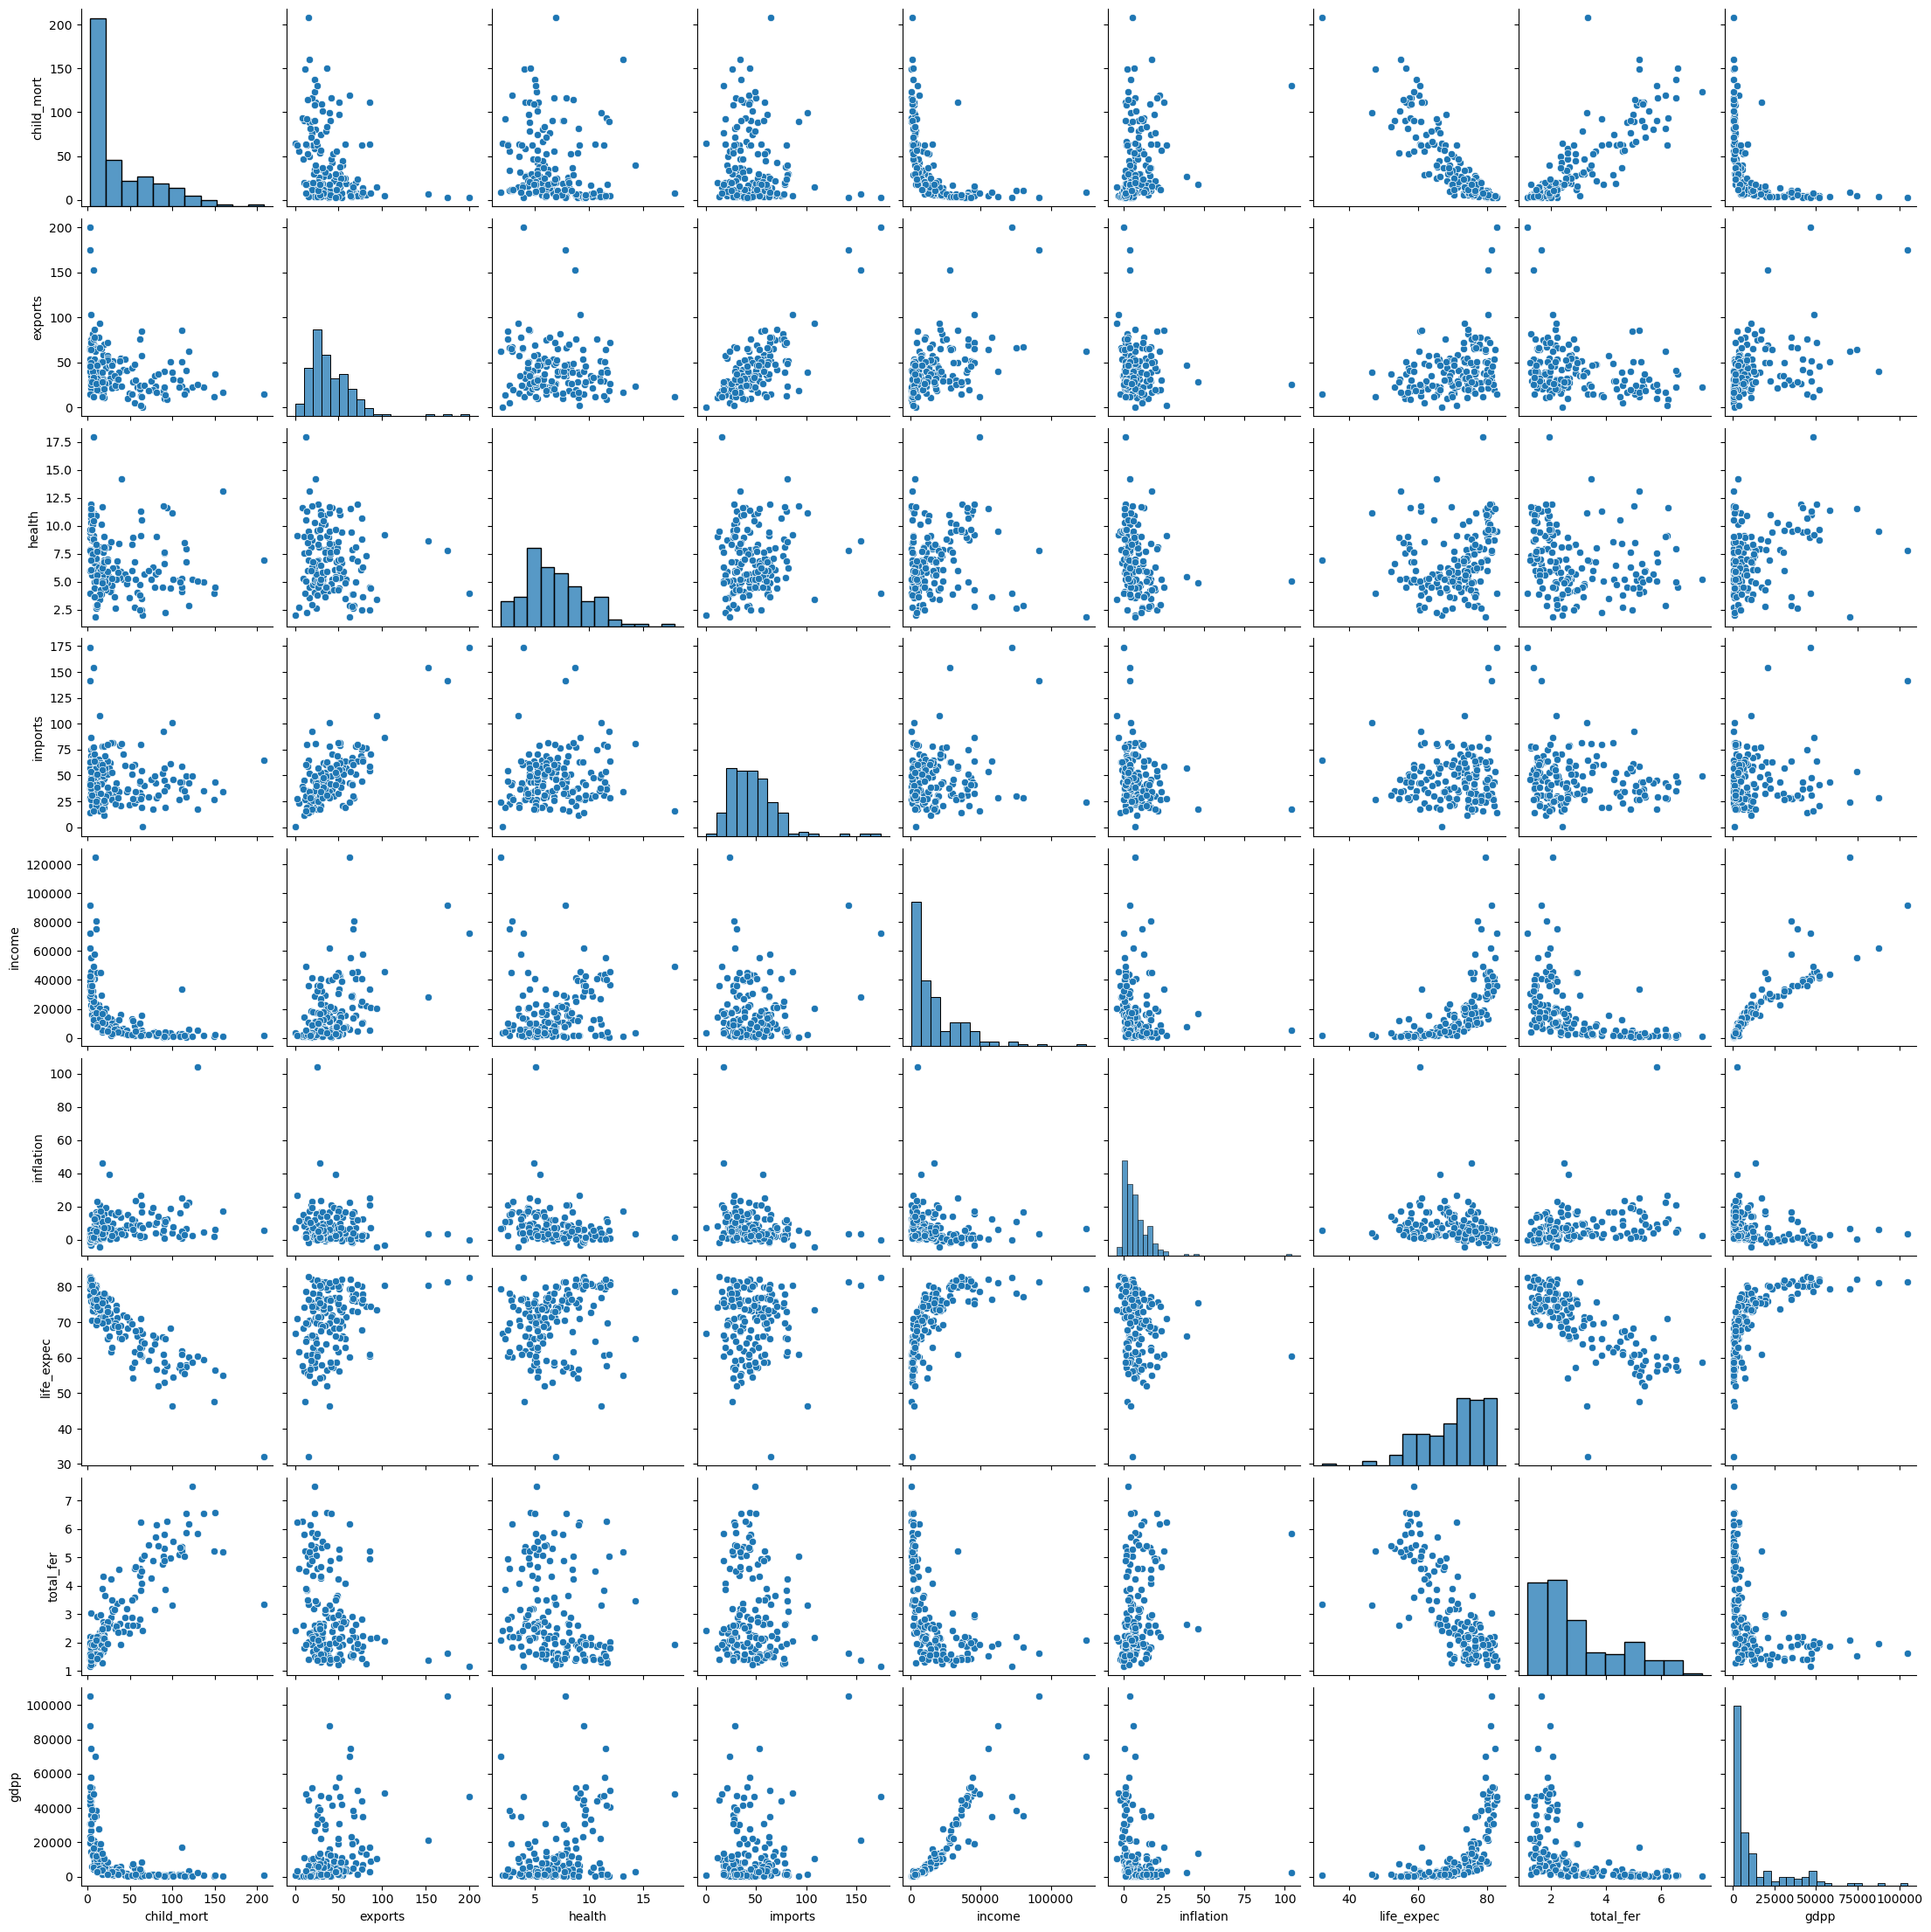

In [172]:
# Plot pairplot
sns.pairplot(data)
plt.show()


Feature Scaling

In [173]:
# drop 'country' column and save new DataFrame as train_df
train_df = df.drop(columns='country')

In [174]:
# transform DataFram 'train_df' with StandardScaler() to avoid conflecting in model
scaler_df = StandardScaler().fit_transform(train_df)

# Applying KMeans

In [175]:

# create empty list named 'inertia_list' to save every new value of inertia.
inertia_list=[]
# for loop to build model then fit it with data then evaluate it by measure its inertia
for i in range(1, 15, 1):
    # build model with KMeans Algorthim
    model = KMeans(n_clusters=i, random_state=1, n_init='auto')
    # fit model with data 'scaler_df'
    model.fit_transform(scaler_df)
    # measure inertia of model and save it in a variable named 'inertia'
    inertia = model.inertia_
    # add the new value of inertia to 'inertia_list'
    inertia_list.append(inertia)
    # print the output
    print('number of clusters: %d \t\t inertia is: %d'%(i, inertia))

number of clusters: 1 		 inertia is: 1837
number of clusters: 2 		 inertia is: 1388
number of clusters: 3 		 inertia is: 988
number of clusters: 4 		 inertia is: 940
number of clusters: 5 		 inertia is: 650
number of clusters: 6 		 inertia is: 585
number of clusters: 7 		 inertia is: 596
number of clusters: 8 		 inertia is: 529
number of clusters: 9 		 inertia is: 435
number of clusters: 10 		 inertia is: 426
number of clusters: 11 		 inertia is: 397
number of clusters: 12 		 inertia is: 377
number of clusters: 13 		 inertia is: 347
number of clusters: 14 		 inertia is: 335


Obtaining silhouette scores for Kmeans

Number of clusters: 2, Silhouette Score: 0.27728222525652596
Number of clusters: 3, Silhouette Score: 0.3538497118215168
Number of clusters: 4, Silhouette Score: 0.2737417838554471
Number of clusters: 5, Silhouette Score: 0.2627952266813213
Number of clusters: 6, Silhouette Score: 0.2647401853632577
Number of clusters: 7, Silhouette Score: 0.205633591423851
Number of clusters: 8, Silhouette Score: 0.23639218576179086
Number of clusters: 9, Silhouette Score: 0.2549494439325604
Number of clusters: 10, Silhouette Score: 0.2483087279908777
Number of clusters: 11, Silhouette Score: 0.2294903668914578
Number of clusters: 12, Silhouette Score: 0.2270197019815093
Number of clusters: 13, Silhouette Score: 0.21345678632152904
Number of clusters: 14, Silhouette Score: 0.2049639120395377
Number of clusters: 15, Silhouette Score: 0.20325007953938098


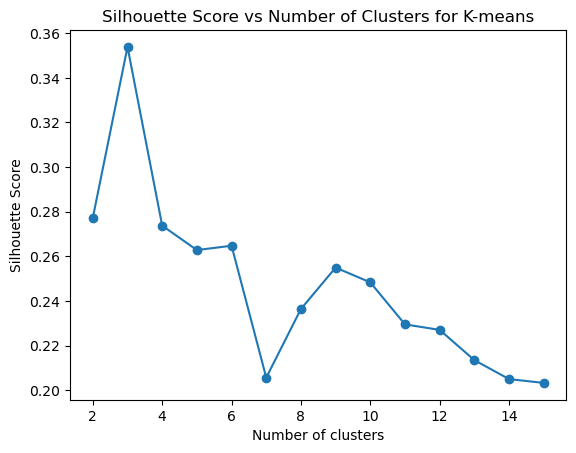

In [194]:
# Create empty list to save silhouette scores for different number of clusters
silhouette_scores = []

# Iterate over different number of clusters
for i in range(2, 16):
    # Build KMeans model with 'i' clusters
    kmeans_model = KMeans(n_clusters=i, random_state=1, n_init='auto')
    
    # Fit the model to the scaled data
    kmeans_model.fit(scaler_df)
    
    # Obtain cluster labels for each data point
    kmeans_labels = kmeans_model.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaler_df, kmeans_labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)
    
    # Print the silhouette score for each number of clusters
    print(f"Number of clusters: {i}, Silhouette Score: {silhouette_avg}")

# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters for K-means')
plt.show()


  optimal K value was found out to be 3

In [177]:
# from previous the optimal k equal 3
# build model with n_clusters=3
model = KMeans(n_clusters=3, n_init='auto', random_state=1)
# fit model with data 'scaler_df'
model.fit(scaler_df)
# get the labels (clustring)
KMeans_labels = model.labels_
# print output
print(KMeans_labels)

[0 1 1 0 1 1 1 2 2 1 1 2 1 1 1 2 1 0 1 1 1 0 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 1 0 1 1 1 1 1 2 2 1 1 0 1 1 0 1 1 0 2 2 2 1 0 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


In [178]:
# create new column named 'group' in DataFrame df by labels data.
df['group'] = KMeans_labels

In [179]:

# print group number and name of its countries
for x in np.array(df['group'].unique()):
    print('group number: %d'%x)
    print(np.array(df[df['group']==x]['country']))

group number: 0
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Uganda' 'Yemen' 'Zambia']
group number: 1
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji'
 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary' 'India' 'Indonesia'
 'Iran' 'Jamaica' 'Jorda

Plotting the clusters after applying PCA for better visualisation

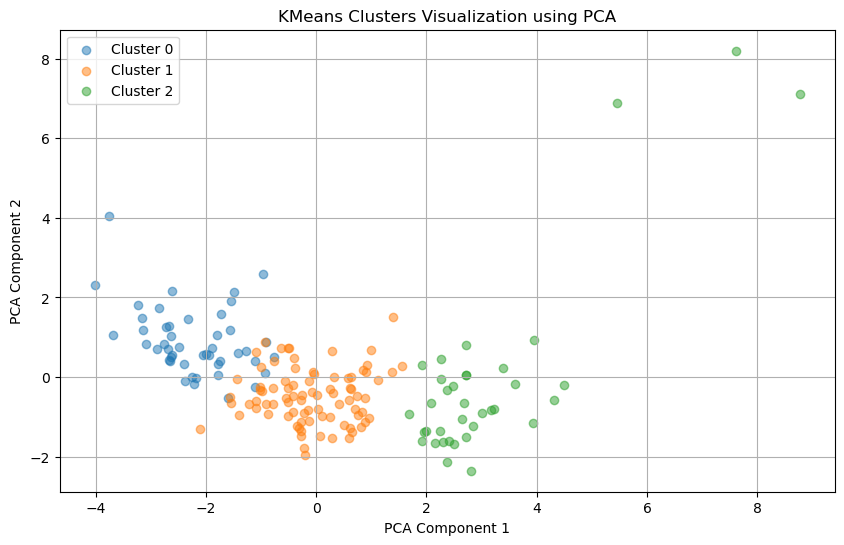

In [182]:

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaler_df)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = pca_result[KMeans_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters Visualization using PCA')
plt.legend()
plt.grid(True)
plt.show()


# Applying Agglomerative Clustering 

obtaining silhouette scores for agglomerative clustering

Number of clusters: 2, Silhouette Score: 0.39452056558935705
Number of clusters: 3, Silhouette Score: 0.35095543174667865
Number of clusters: 4, Silhouette Score: 0.37946199119163876
Number of clusters: 5, Silhouette Score: 0.3828873464580617
Number of clusters: 6, Silhouette Score: 0.2674377070650892
Number of clusters: 7, Silhouette Score: 0.2738851624983615
Number of clusters: 8, Silhouette Score: 0.23339491055920697
Number of clusters: 9, Silhouette Score: 0.21090278563116704
Number of clusters: 10, Silhouette Score: 0.2118572179199991
Number of clusters: 11, Silhouette Score: 0.20611456852834928
Number of clusters: 12, Silhouette Score: 0.21271834445075852
Number of clusters: 13, Silhouette Score: 0.19853969333986332
Number of clusters: 14, Silhouette Score: 0.20536484641251007
Number of clusters: 15, Silhouette Score: 0.20807593432869295


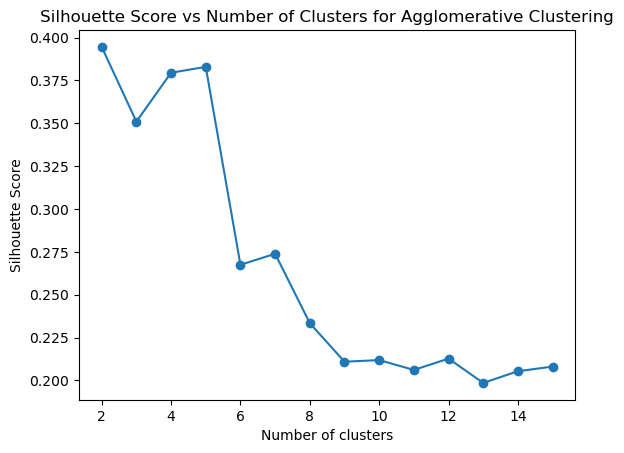

In [195]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Create empty list to save silhouette scores for different number of clusters
silhouette_scores_agg = []

# Iterate over different number of clusters
for i in range(2, 16):
    # Build AgglomerativeClustering model with 'i' clusters
    agg_model = AgglomerativeClustering(n_clusters=i)
    
    # Fit the model to the scaled data
    agg_model.fit(scaler_df)
    
    # Obtain cluster labels for each data point
    agg_labels = agg_model.labels_
    
    # Calculate silhouette score
    silhouette_avg_agg = silhouette_score(scaler_df, agg_labels)
    
    # Append the silhouette score to the list
    silhouette_scores_agg.append(silhouette_avg_agg)
    
    # Print the silhouette score for each number of clusters
    print(f"Number of clusters: {i}, Silhouette Score: {silhouette_avg_agg}")

# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores_agg, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters for Agglomerative Clustering')
plt.show()


choosing number of clusters as 5

In [197]:
# build model
model = AgglomerativeClustering(n_clusters=5, linkage='average')
# fit model with data 'scaler_df'
model.fit(scaler_df)
# get labels and save it in variable named 'AgglomerativeClustering_labels'
AgglomerativeClustering_labels = model.labels_
# print labels
print(AgglomerativeClustering_labels)

[4 4 4 4 4 4 4 1 1 4 4 1 4 4 4 1 4 4 4 4 4 4 4 1 4 4 4 4 4 1 4 4 4 4 4 4 4
 4 4 4 4 4 1 1 1 4 4 4 4 4 4 4 4 1 1 4 4 4 1 4 1 4 4 4 4 4 3 4 1 4 4 4 4 1
 1 1 4 1 4 4 4 4 1 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 1
 1 4 2 1 4 4 4 4 4 4 4 1 1 4 4 4 4 4 4 4 4 4 0 1 1 4 4 1 1 4 4 4 4 1 1 4 4
 4 4 4 4 4 4 4 4 4 1 1 1 4 4 4 4 4 4 4]


In [198]:
# save 'AgglomerativeClustering_labels' in column 'group'.
df['group'] = AgglomerativeClustering_labels

In [199]:
# print group number and name of its countries
for x in np.array(df['group'].unique()):
    print('group number: %d'%x)
    print(np.array(df[df['group']==x]['country']))

group number: 4
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados'
 'Belarus' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Fiji' 'Gabon'
 'Gambia' 'Georgia' 'Ghana' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Hungary' 'India' 'Indonesia' 'Iran' 'Iraq' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Kyrgyz Republic' 'Lao' 'Latvia'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Macedonia, FYR'
 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Mali' 'Mauritania'
 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Montenegro'
 'Morocco' 

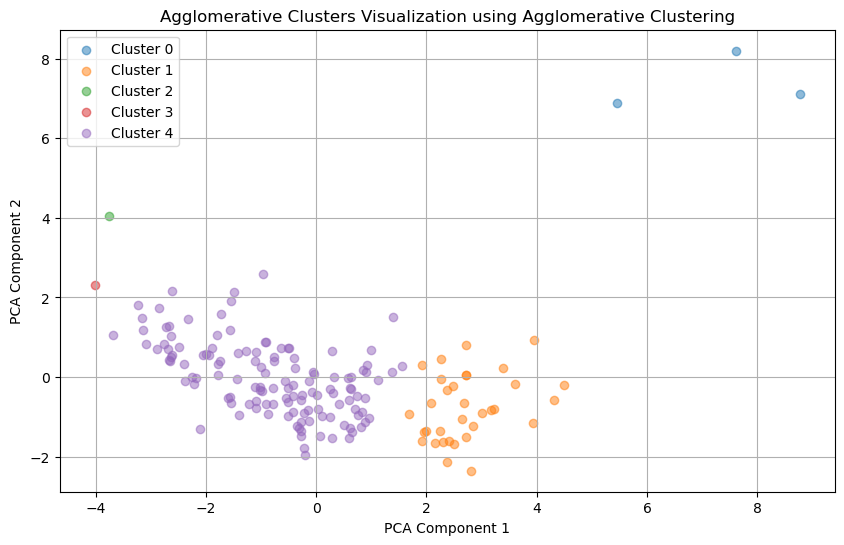

In [200]:
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaler_df)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(5):  
    cluster_data = pca_result[AgglomerativeClustering_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clusters Visualization using Agglomerative Clustering')
plt.legend()
plt.grid(True)
plt.show()



After analyzing the optimal number of clusters using silhouette scores for both K-means and agglomerative clustering on the country dataset, it was observed that K-means clustering resulted in tighter and more cohesive clusters compared to agglomerative clustering. The silhouette scores indicated that K-means achieved better separation between clusters and higher cohesion within clusters, leading to more distinct and well-defined groupings of countries. This suggests that K-means may be more suitable for this dataset, as it effectively captured the underlying patterns and structure in the data, resulting in more meaningful and interpretable clusters. Agglomerative clustering, on the other hand, produced clusters that were less compact and more spread out, indicating lower cohesion and potentially overlapping clusters. Overall, based on the analysis, K-means clustering appeared to be more effective in partitioning the countries into distinct and homogeneous groups based on their socio-economic and health factors.
